# Codigo arboles de clasificacion

## Preparacion de datos

In [1]:
# Librerias
library(tree)

# Importar csv como dataframe
datos <- read.csv("./DatosInformeAC.csv", header = TRUE, sep = ",")

# Transformar las columnas 'Prediction' y 'attachment_size' a factor
datos$Prediction      <- as.factor(datos$Prediction)
datos$attachment_size <- as.factor(datos$attachment_size)

# Quitar la primera columna del dataframe (no es necesaria pues son indices)
datos <- datos[,-1] # 400 filas, 1824 columnas

datos

speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,none,1
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,large,1
0,1,0,0,0,0,0,0,1,0,⋯,0,0,0,0,2,0,0,0,large,1
0,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,1,0,0,0,large,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,1
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,large,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,0
0,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,none,1


## 1

Describa el conjunto de datos: Cantidad de datos, Tipo y Valores posibles de cada atributo, Indique
la cantidad de registros por clase.

### Descripcion de los datos

In [2]:
# Sumar las columnas del dataframe excepto las dos ultimas y guardarlo como dataframe
sum_columnas <- colSums(datos[,1:(ncol(datos)-2)])

# Añadir 'Prediction' al vector de sumas
sum_columnas["Prediction"] <- sum(datos$Prediction == 1)

# Añadir 'attachment_size' al vector de sumas
sum_columnas["attachment_size_none"]  <- sum(datos$attachment_size == "none")
sum_columnas["attachment_size_small"] <- sum(datos$attachment_size == "small")
sum_columnas["attachment_size_large"] <- sum(datos$attachment_size == "large")

# Guardar el vector de sumas como dataframe y transponerlo
sum_columnas <- as.data.frame(t(sum_columnas))

sum_columnas[c("thanks", "subject", "Prediction", "attachment_size_none", "attachment_size_small", "attachment_size_large")]

# De los 400 correos, 200 tienen el valor '1' en la columna 'Prediction'
# La columna 'attachment_size' tiene 3 valores: 'large' 'none' y 'small'

thanks,subject,Prediction,attachment_size_none,attachment_size_small,attachment_size_large
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
98,161,200,130,137,133


## 3
Genere e imprima un árbol considerando el 70 % de los datos entregados para training, utilice como
criterio de división gini y deviance, luego conteste lo siguiente:

* Describa el árbol obtenido: cantidad de niveles (profundidad) y de hojas del árbol.

* Evalúe el árbol utilizando la métrica accuracy, imprima dicha métrica y comente acerca del
desempeño del modelo.

### Definición de Train Set y Test Set (70%)

In [3]:
 

# Porcentaje de datos para entrenamiento
training_perc  <- 0.7

# Crear sets de entrenamiento y testing
training_index <- sample(1:nrow(datos), floor(training_perc*nrow(datos)))
training_set   <- datos[training_index,] # 280 filas, 1824 columnas
testing_set    <- datos[-training_index,] # 120 filas, 1824 columnas

training_set
testing_set

,speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
92,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,1
312,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
373,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,large,0
246,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,4,0,0,0,small,0
326,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,none,1
368,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,1
323,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,none,0
210,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,2,0,0,0,none,0
86,0,1,0,0,0,0,2,1,7,0,⋯,0,0,0,0,6,0,0,0,large,0


,speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,1
8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,0
10,0,1,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,large,1
11,0,1,0,0,0,0,0,8,0,0,⋯,0,2,0,0,8,0,0,1,small,0
13,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
15,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,0
19,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,small,0
21,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
24,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,0


### Construcción de árbol

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

    1) root 280 387.900 1 ( 0.48571 0.51429 )  
      2) thanks < 0.5 221 295.400 1 ( 0.38914 0.61086 )  
        4) attached < 0.5 200 253.700 1 ( 0.33000 0.67000 )  
          8) gas < 1.5 188 225.500 1 ( 0.28723 0.71277 )  
           16) via < 0.5 163 207.000 1 ( 0.33129 0.66871 )  
             32) subject < 0.5 147 174.000 1 ( 0.27891 0.72109 )  
               64) tap < 0.5 138 151.800 1 ( 0.23913 0.76087 )  
                128) plant < 0.5 132 133.800 1 ( 0.20455 0.79545 )  
                  256) flow < 0.5 127 117.100 1 ( 0.17323 0.82677 )  
                    512) following < 0.5 119  93.950 1 ( 0.13445 0.86555 )  
                     1024) her < 1.5 90  84.240 1 ( 0.17778 0.82222 )  
                       2048) with < 2.5 82  68.270 1 ( 0.14634 0.85366 )  
                         4096) pro < 0.5 58  59.140 1 ( 0.20690 0.79310 )  
                           8192) deal < 0.5 53  48.290 1 ( 0.16981 0.


Classification tree:
tree(formula = Prediction ~ ., data = training_set, split = c("deviance", 
    "gini"))
Variables actually used in tree construction:
 [1] "thanks"          "attached"        "gas"             "via"            
 [5] "subject"         "tap"             "plant"           "flow"           
 [9] "following"       "her"             "with"            "pro"            
[13] "deal"            "that"            "attachment_size" "use"            
[17] "limited"         "real"            "check"          
Number of terminal nodes:  20 
Residual mean deviance:  0.41 = 106.6 / 260 
Misclassification error rate: 0.09286 = 26 / 280 

[1] "Numero de nodos: 39"
[1] "Numero de hojas: 20"
[1] "Profundidad: 15"


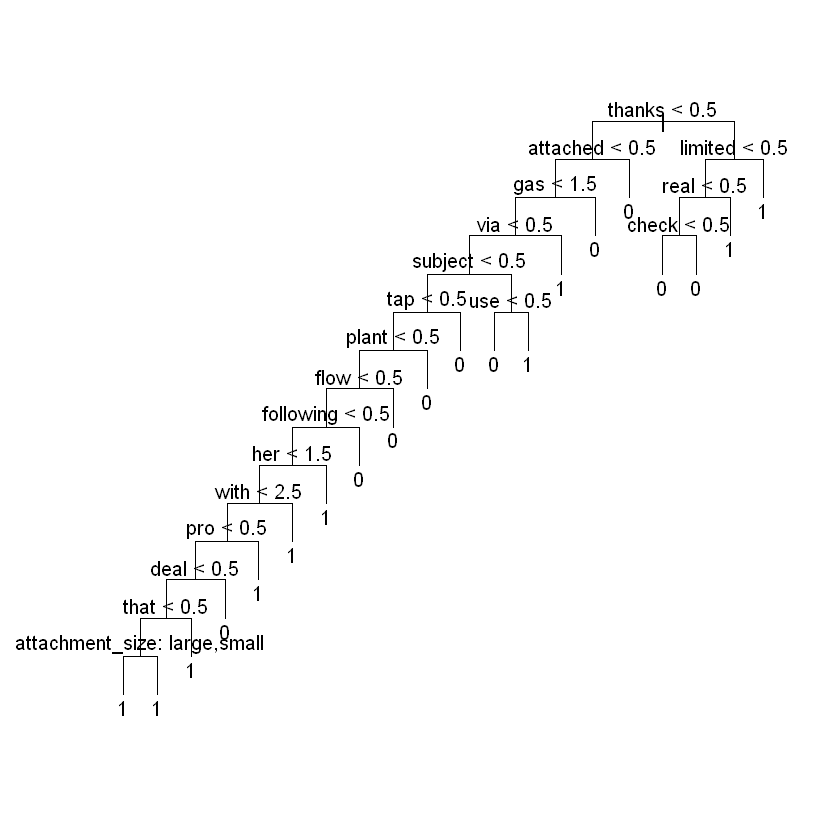

In [4]:
 

# Crear arbol de clasificacion
arbol <- tree(Prediction ~ ., data = training_set, split = c("deviance", "gini"))

# Propiedades del arbol
arbol_nodes <- length(arbol$frame$var)
arbol_leafs <- sum(arbol$frame$var == "<leaf>")
arbol_depth <- floor(log(max(as.integer(row.names(arbol$frame))), base = 2))

arbol
summary(arbol)
print(paste0("Numero de nodos: ", arbol_nodes))
print(paste0("Numero de hojas: ", arbol_leafs))
print(paste0("Profundidad: ", arbol_depth))
plot(arbol, type = "uniform")
text(arbol, pretty = 0, cex = 1.0)

### Testeo de árbol

In [5]:
 

# Testear el arbol
predict_arbol <- predict(arbol, testing_set, type = "class")

# Matriz de confusion
confusion_matrix <- with(testing_set, table(predict_arbol, testing_set$Prediction))
# La matriz de confusion se lee de la siguiente manera:
# Primera fila: el arbol predijo que 48 correos no eran spam, y en realidad no lo eran.
# Pero predijo que 8 correos no eran spam, y en realidad si lo eran.

# Calcular accuracy
accuracy_arbol <- sum(predict_arbol == testing_set$Prediction) / length(testing_set$Prediction)

confusion_matrix
print(paste0("Total de datos de testeo: ", length(testing_set$Prediction)))
print(paste0("Predicciones correctas: ", sum(predict_arbol == testing_set$Prediction)))
print(paste0("Predicciones incorrectas: ", sum(predict_arbol != testing_set$Prediction)))
print(paste0("Accuracy: ", accuracy_arbol))

             
predict_arbol  0  1
            0 48  8
            1 16 48

[1] "Total de datos de testeo: 120"
[1] "Predicciones correctas: 96"
[1] "Predicciones incorrectas: 24"
[1] "Accuracy: 0.8"


## 4

¿Que sucede si utiliza un 30%, 50% y 70% do los datos entregados como training? Genere, imprima
y evalúe los árboles obtenidos (utilice accuracy). Compare las resultados e indique qué árbol es el
mejor.

### 30% para entrenamiento

#### Definicición de Train Set y Test Set (30%)

In [6]:
 

# Porcentaje de datos para entrenamiento
training_perc  <- 0.3

# Crear sets de entrenamiento y testing
training_index <- sample(1:nrow(datos), floor(training_perc*nrow(datos)))
training_set   <- datos[training_index,] # 120 filas, 1824 columnas
testing_set    <- datos[-training_index,] # 280 filas, 1824 columnas

training_set
testing_set

,speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
92,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,1
312,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
373,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,large,0
246,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,4,0,0,0,small,0
326,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,none,1
368,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,1
323,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,none,0
210,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,2,0,0,0,none,0
86,0,1,0,0,0,0,2,1,7,0,⋯,0,0,0,0,6,0,0,0,large,0


,speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,none,1
3,0,1,0,0,0,0,0,0,1,0,⋯,0,0,0,0,2,0,0,0,large,1
4,0,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,1,0,0,0,large,1
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,1
8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,0
9,0,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,none,1
10,0,1,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,large,1
11,0,1,0,0,0,0,0,8,0,0,⋯,0,2,0,0,8,0,0,1,small,0
12,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,none,1


#### Construcción de árbol

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 120 165.800 0 ( 0.53333 0.46667 )  
    2) subject < 0.5 91 123.000 1 ( 0.40659 0.59341 )  
      4) your < 0.5 57  78.160 0 ( 0.56140 0.43860 )  
        8) gra < 0.5 47  60.280 0 ( 0.65957 0.34043 )  
         16) act < 0.5 37  50.620 0 ( 0.56757 0.43243 )  
           32) meter < 0.5 30  41.460 1 ( 0.46667 0.53333 )  
             64) attached < 0.5 25  32.670 1 ( 0.36000 0.64000 )  
              128) gas < 0.5 20  20.020 1 ( 0.20000 0.80000 )  
                256) the < 1.5 14   7.205 1 ( 0.07143 0.92857 ) *
                257) the > 1.5 6   8.318 0 ( 0.50000 0.50000 ) *
              129) gas > 0.5 5   0.000 0 ( 1.00000 0.00000 ) *
             65) attached > 0.5 5   0.000 0 ( 1.00000 0.00000 ) *
           33) meter > 0.5 7   0.000 0 ( 1.00000 0.00000 ) *
         17) act > 0.5 10   0.000 0 ( 1.00000 0.00000 ) *
        9) gra > 0.5 10   6.502 1 ( 0.10000 0.90000 ) *
      5) your > 0.5 34  28.39


Classification tree:
tree(formula = Prediction ~ ., data = training_set, split = c("deviance", 
    "gini"))
Variables actually used in tree construction:
 [1] "subject"  "your"     "gra"      "act"      "meter"    "attached"
 [7] "gas"      "the"      "and"      "that"     "net"     
Number of terminal nodes:  12 
Residual mean deviance:  0.3626 = 39.17 / 108 
Misclassification error rate: 0.075 = 9 / 120 

[1] "Numero de nodos: 23"
[1] "Numero de hojas: 12"
[1] "Profundidad: 8"


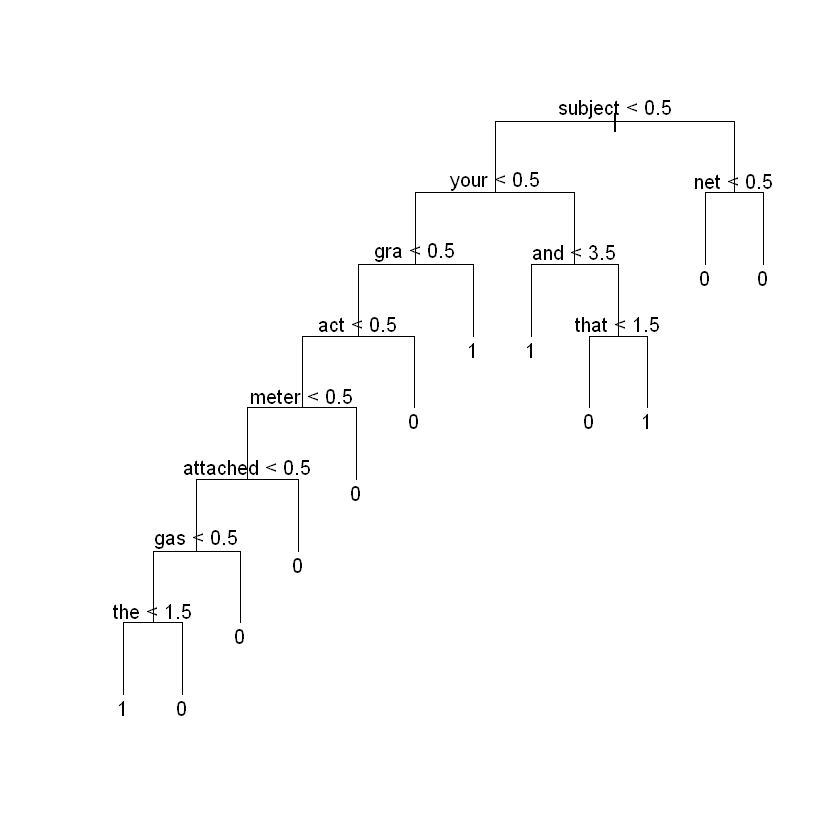

In [7]:
 

# Crear arbol de clasificacion
arbol <- tree(Prediction ~ ., data = training_set, split = c("deviance", "gini"))

# Propiedades del arbol
arbol_nodes <- length(arbol$frame$var)
arbol_leafs <- sum(arbol$frame$var == "<leaf>")
arbol_depth <- floor(log(max(as.integer(row.names(arbol$frame))), base = 2))

arbol
summary(arbol)
print(paste0("Numero de nodos: ", arbol_nodes))
print(paste0("Numero de hojas: ", arbol_leafs))
print(paste0("Profundidad: ", arbol_depth))
plot(arbol, type = "uniform")
text(arbol, pretty = 0, cex = 1.0)

#### Testeo de árbol

In [8]:
 

# Testear el arbol
predict_arbol <- predict(arbol, testing_set, type = "class")

# Matriz de confusion
confusion_matrix <- with(testing_set, table(predict_arbol, testing_set$Prediction))

# Calcular accuracy
accuracy_arbol <- sum(predict_arbol == testing_set$Prediction) / length(testing_set$Prediction)

confusion_matrix
print(paste0("Total de datos de testeo: ", length(testing_set$Prediction)))
print(paste0("Predicciones correctas: ", sum(predict_arbol == testing_set$Prediction)))
print(paste0("Predicciones incorrectas: ", sum(predict_arbol != testing_set$Prediction)))
print(paste0("Accuracy: ", accuracy_arbol))

             
predict_arbol   0   1
            0 105  35
            1  31 109

[1] "Total de datos de testeo: 280"
[1] "Predicciones correctas: 214"
[1] "Predicciones incorrectas: 66"
[1] "Accuracy: 0.764285714285714"


### 50% para entrenamiento

#### Definicición de Train Set y Test Set (50%)

In [9]:
 

# Porcentaje de datos para entrenamiento
training_perc  <- 0.5

# Crear sets de entrenamiento y testing
training_index <- sample(1:nrow(datos), floor(training_perc*nrow(datos)))
training_set   <- datos[training_index,] # 200 filas, 1824 columnas
testing_set    <- datos[-training_index,] # 200 filas, 1824 columnas

training_set
testing_set

,speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
92,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,1
312,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
373,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,large,0
246,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,4,0,0,0,small,0
326,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,none,1
368,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,1
323,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,none,0
210,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,2,0,0,0,none,0
86,0,1,0,0,0,0,2,1,7,0,⋯,0,0,0,0,6,0,0,0,large,0


,speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
4,0,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,1,0,0,0,large,1
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,1
8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,0
10,0,1,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,large,1
11,0,1,0,0,0,0,0,8,0,0,⋯,0,2,0,0,8,0,0,1,small,0
12,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,none,1
13,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
14,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,1
15,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,0


#### Construcción de árbol

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 200 277.300 0 ( 0.50000 0.50000 )  
   2) subject < 0.5 161 216.400 1 ( 0.39752 0.60248 )  
     4) your < 0.5 107 148.100 0 ( 0.52336 0.47664 )  
       8) gra < 0.5 90 120.300 0 ( 0.61111 0.38889 )  
        16) for. < 0.5 41  51.220 1 ( 0.31707 0.68293 )  
          32) met < 1 36  38.140 1 ( 0.22222 0.77778 )  
            64) the < 1.5 28  22.970 1 ( 0.14286 0.85714 ) *
            65) the > 1.5 8  11.090 1 ( 0.50000 0.50000 ) *
          33) met > 1 5   0.000 0 ( 1.00000 0.00000 ) *
        17) for. > 0.5 49  40.190 0 ( 0.85714 0.14286 )  
          34) ever < 0.5 44  26.810 0 ( 0.90909 0.09091 )  
            68) one < 0.5 37  15.560 0 ( 0.94595 0.05405 ) *
            69) one > 0.5 7   8.376 0 ( 0.71429 0.28571 ) *
          35) ever > 0.5 5   6.730 1 ( 0.40000 0.60000 ) *
       9) gra > 0.5 17   7.606 1 ( 0.05882 0.94118 ) *
     5) your > 0.5 54  45.300 1 ( 0.14815 0.85185 )  
      10) and < 3.


Classification tree:
tree(formula = Prediction ~ ., data = training_set, split = c("deviance", 
    "gini"))
Variables actually used in tree construction:
 [1] "subject" "your"    "gra"     "for."    "met"     "the"     "ever"   
 [8] "one"     "and"     "you"     "all"    
Number of terminal nodes:  14 
Residual mean deviance:  0.5097 = 94.81 / 186 
Misclassification error rate: 0.1 = 20 / 200 

[1] "Numero de nodos: 27"
[1] "Numero de hojas: 14"
[1] "Profundidad: 6"


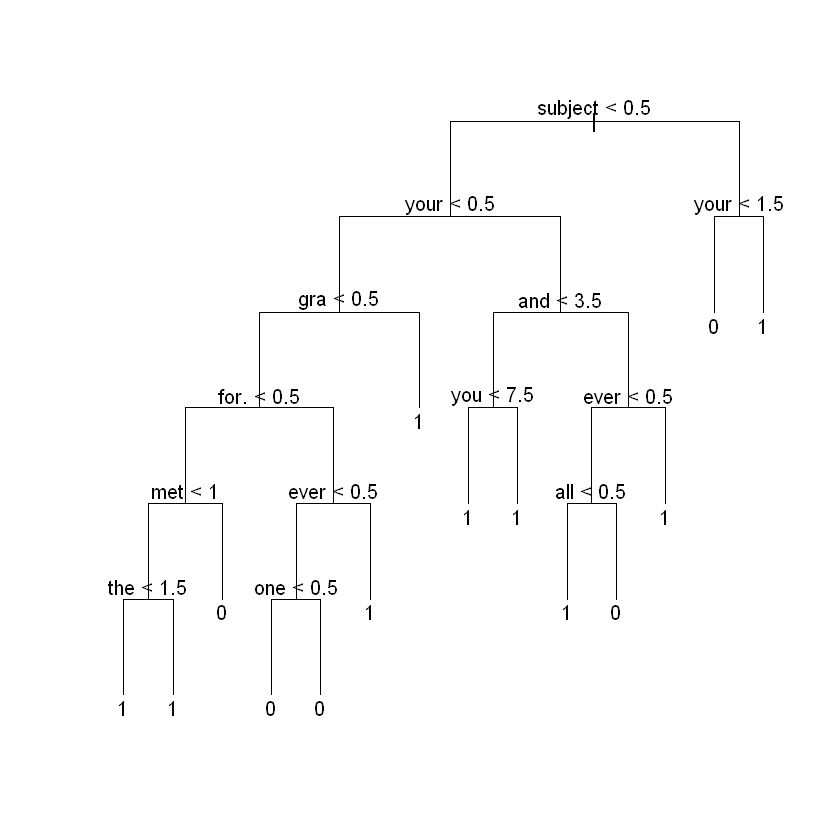

In [10]:
 

# Crear arbol de clasificacion
arbol <- tree(Prediction ~ ., data = training_set, split = c("deviance", "gini"))

# Propiedades del arbol
arbol_nodes <- length(arbol$frame$var)
arbol_leafs <- sum(arbol$frame$var == "<leaf>")
arbol_depth <- floor(log(max(as.integer(row.names(arbol$frame))), base = 2))

arbol
summary(arbol)
print(paste0("Numero de nodos: ", arbol_nodes))
print(paste0("Numero de hojas: ", arbol_leafs))
print(paste0("Profundidad: ", arbol_depth))
plot(arbol, type = "uniform")
text(arbol, pretty = 0, cex = 1.0)

#### Testeo de árbol

In [11]:
 

# Testear el arbol
predict_arbol <- predict(arbol, testing_set, type = "class")

# Matriz de confusion
confusion_matrix <- with(testing_set, table(predict_arbol, testing_set$Prediction))

# Calcular accuracy
accuracy_arbol <- sum(predict_arbol == testing_set$Prediction) / length(testing_set$Prediction)

confusion_matrix
print(paste0("Total de datos de testeo: ", length(testing_set$Prediction)))
print(paste0("Predicciones correctas: ", sum(predict_arbol == testing_set$Prediction)))
print(paste0("Predicciones incorrectas: ", sum(predict_arbol != testing_set$Prediction)))
print(paste0("Accuracy: ", accuracy_arbol))

             
predict_arbol  0  1
            0 74 22
            1 26 78

[1] "Total de datos de testeo: 200"
[1] "Predicciones correctas: 152"
[1] "Predicciones incorrectas: 48"
[1] "Accuracy: 0.76"


## 5

Se desea mejorar el rendimiento temporal del árbol, sin disminuir su efectividad, considerando esta
vez el 80 % de los datos para training. Construya, imprima y evalúe los siguientes árboles, utilizando
los siguientes atributos para cada caso:

- Solo atributo 'thanks'

- Atributos 'thanks' y 'subject'

- 'thanks', 'subject' y 'attachment_size'

- Todos los atributos

### Definicición de Train Set y Test Set (80%)

In [12]:
 

# Porcentaje de datos para entrenamiento
training_perc  <- 0.8

# Crear sets de entrenamiento y testing
training_index <- sample(1:nrow(datos), floor(training_perc*nrow(datos)))
training_set   <- datos[training_index,] # 320 filas, 1824 columnas
testing_set    <- datos[-training_index,] # 80 filas, 1824 columnas

training_set
testing_set

,speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
92,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,1
312,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
373,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,large,0
246,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,4,0,0,0,small,0
326,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,none,1
368,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,1
323,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,none,0
210,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,2,0,0,0,none,0
86,0,1,0,0,0,0,2,1,7,0,⋯,0,0,0,0,6,0,0,0,large,0


,speculative,vice,home,might,charge,obtain,indicate,energy,per,lottery,⋯,afternoon,cross,shopping,hence,are,agent,grow,incorrect,attachment_size,Prediction
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,none,0
10,0,1,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,large,1
11,0,1,0,0,0,0,0,8,0,0,⋯,0,2,0,0,8,0,0,1,small,0
15,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,0
21,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,0
24,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,large,0
25,0,0,0,0,1,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,large,0
30,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,3,0,0,0,small,1
46,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,small,1


### Solo atributo 'thanks'

#### Construcción de árbol

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

1) root 320 443.30 1 ( 0.4844 0.5156 )  
  2) thanks < 0.5 257 344.40 1 ( 0.3930 0.6070 ) *
  3) thanks > 0.5 63  51.67 0 ( 0.8571 0.1429 )  
    6) thanks < 1.5 50  47.14 0 ( 0.8200 0.1800 ) *
    7) thanks > 1.5 13   0.00 0 ( 1.0000 0.0000 ) *


Classification tree:
tree(formula = Prediction ~ thanks, data = training_set, split = c("deviance", 
    "gini"))
Number of terminal nodes:  3 
Residual mean deviance:  1.235 = 391.6 / 317 
Misclassification error rate: 0.3438 = 110 / 320 

[1] "Numero de nodos: 5"
[1] "Numero de hojas: 3"
[1] "Profundidad: 2"


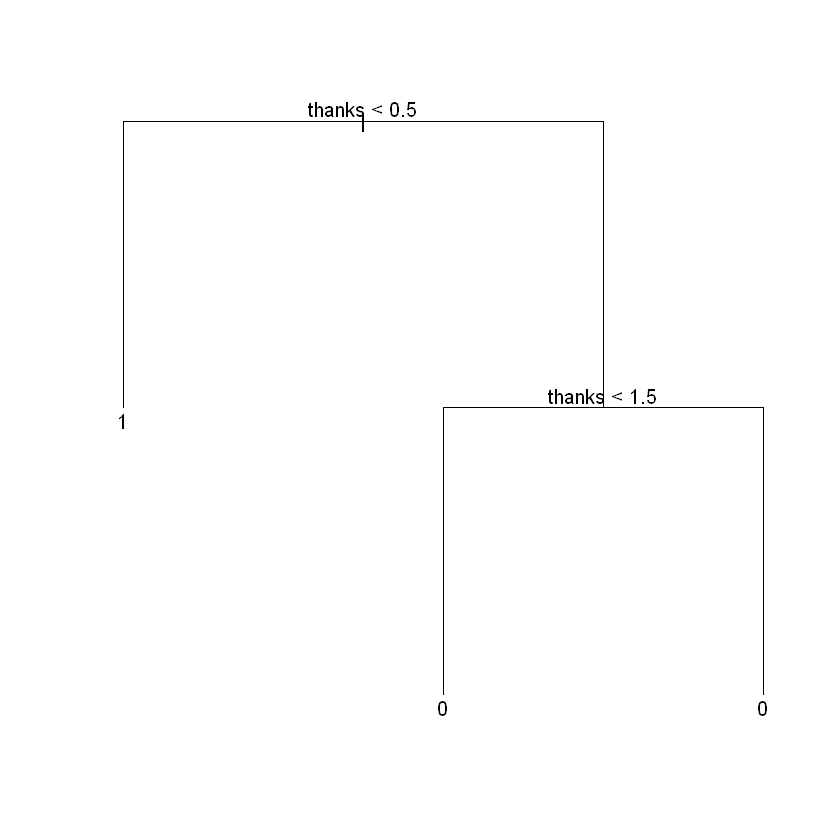

In [13]:
 

# Crear arbol de clasificacion
arbol <- tree(Prediction ~ thanks, data = training_set, split = c("deviance", "gini"))

# Propiedades del arbol
arbol_nodes <- length(arbol$frame$var)
arbol_leafs <- sum(arbol$frame$var == "<leaf>")
arbol_depth <- floor(log(max(as.integer(row.names(arbol$frame))), base = 2))

arbol
summary(arbol)
print(paste0("Numero de nodos: ", arbol_nodes))
print(paste0("Numero de hojas: ", arbol_leafs))
print(paste0("Profundidad: ", arbol_depth))
plot(arbol, type = "uniform")
text(arbol, pretty = 0, cex = 1.0)

#### Testeo de árbol

In [14]:
 

# Testear el arbol
predict_arbol <- predict(arbol, testing_set, type = "class")

# Matriz de confusion
confusion_matrix <- with(testing_set, table(predict_arbol, testing_set$Prediction))

# Calcular accuracy
accuracy_arbol <- sum(predict_arbol == testing_set$Prediction) / length(testing_set$Prediction)

confusion_matrix
print(paste0("Total de datos de testeo: ", length(testing_set$Prediction)))
print(paste0("Predicciones correctas: ", sum(predict_arbol == testing_set$Prediction)))
print(paste0("Predicciones incorrectas: ", sum(predict_arbol != testing_set$Prediction)))
print(paste0("Accuracy: ", accuracy_arbol))

             
predict_arbol  0  1
            0 12  3
            1 33 32

[1] "Total de datos de testeo: 80"
[1] "Predicciones correctas: 44"
[1] "Predicciones incorrectas: 36"
[1] "Accuracy: 0.55"


### Atributos 'thanks' y 'subject'

#### Construcción de árbol

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

1) root 320 443.30 1 ( 0.4844 0.5156 )  
  2) thanks < 0.5 257 344.40 1 ( 0.3930 0.6070 )  
    4) subject < 0.5 224 287.00 1 ( 0.3393 0.6607 ) *
    5) subject > 0.5 33  36.55 0 ( 0.7576 0.2424 ) *
  3) thanks > 0.5 63  51.67 0 ( 0.8571 0.1429 )  
    6) thanks < 1.5 50  47.14 0 ( 0.8200 0.1800 ) *
    7) thanks > 1.5 13   0.00 0 ( 1.0000 0.0000 ) *


Classification tree:
tree(formula = Prediction ~ thanks + subject, data = training_set, 
    split = c("deviance", "gini"))
Number of terminal nodes:  4 
Residual mean deviance:  1.173 = 370.7 / 316 
Misclassification error rate: 0.2906 = 93 / 320 

[1] "Numero de nodos: 7"
[1] "Numero de hojas: 4"
[1] "Profundidad: 2"


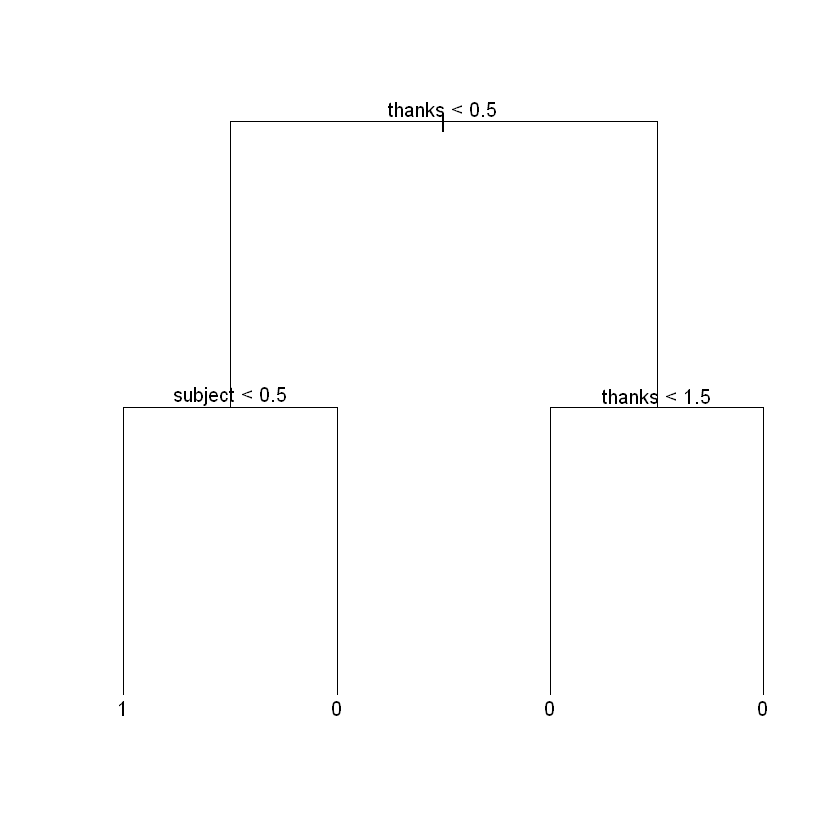

In [15]:
 

# Crear arbol de clasificacion
arbol <- tree(Prediction ~ thanks + subject, data = training_set, split = c("deviance", "gini"))

# Propiedades del arbol
arbol_nodes <- length(arbol$frame$var)
arbol_leafs <- sum(arbol$frame$var == "<leaf>")
arbol_depth <- floor(log(max(as.integer(row.names(arbol$frame))), base = 2))

arbol
summary(arbol)
print(paste0("Numero de nodos: ", arbol_nodes))
print(paste0("Numero de hojas: ", arbol_leafs))
print(paste0("Profundidad: ", arbol_depth))
plot(arbol, type = "uniform")
text(arbol, pretty = 0, cex = 1.0)

#### Testeo de árbol

In [16]:
 

# Testear el arbol
predict_arbol <- predict(arbol, testing_set, type = "class")

# Matriz de confusion
confusion_matrix <- with(testing_set, table(predict_arbol, testing_set$Prediction))

# Calcular accuracy
accuracy_arbol <- sum(predict_arbol == testing_set$Prediction) / length(testing_set$Prediction)

confusion_matrix
print(paste0("Total de datos de testeo: ", length(testing_set$Prediction)))
print(paste0("Predicciones correctas: ", sum(predict_arbol == testing_set$Prediction)))
print(paste0("Predicciones incorrectas: ", sum(predict_arbol != testing_set$Prediction)))
print(paste0("Accuracy: ", accuracy_arbol))

             
predict_arbol  0  1
            0 20  4
            1 25 31

[1] "Total de datos de testeo: 80"
[1] "Predicciones correctas: 51"
[1] "Predicciones incorrectas: 29"
[1] "Accuracy: 0.6375"


### 'thanks', 'subject' y 'attachment_size'

#### Construcción de árbol

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 320 443.30 1 ( 0.4844 0.5156 )  
   2) thanks < 0.5 257 344.40 1 ( 0.3930 0.6070 )  
     4) subject < 0.5 224 287.00 1 ( 0.3393 0.6607 ) *
     5) subject > 0.5 33  36.55 0 ( 0.7576 0.2424 )  
      10) attachment_size: none 9   0.00 0 ( 1.0000 0.0000 ) *
      11) attachment_size: large,small 24  30.55 0 ( 0.6667 0.3333 ) *
   3) thanks > 0.5 63  51.67 0 ( 0.8571 0.1429 )  
     6) thanks < 1.5 50  47.14 0 ( 0.8200 0.1800 ) *
     7) thanks > 1.5 13   0.00 0 ( 1.0000 0.0000 ) *


Classification tree:
tree(formula = Prediction ~ thanks + subject + attachment_size, 
    data = training_set, split = c("deviance", "gini"))
Number of terminal nodes:  5 
Residual mean deviance:  1.158 = 364.7 / 315 
Misclassification error rate: 0.2906 = 93 / 320 

[1] "Numero de nodos: 9"
[1] "Numero de hojas: 5"
[1] "Profundidad: 3"


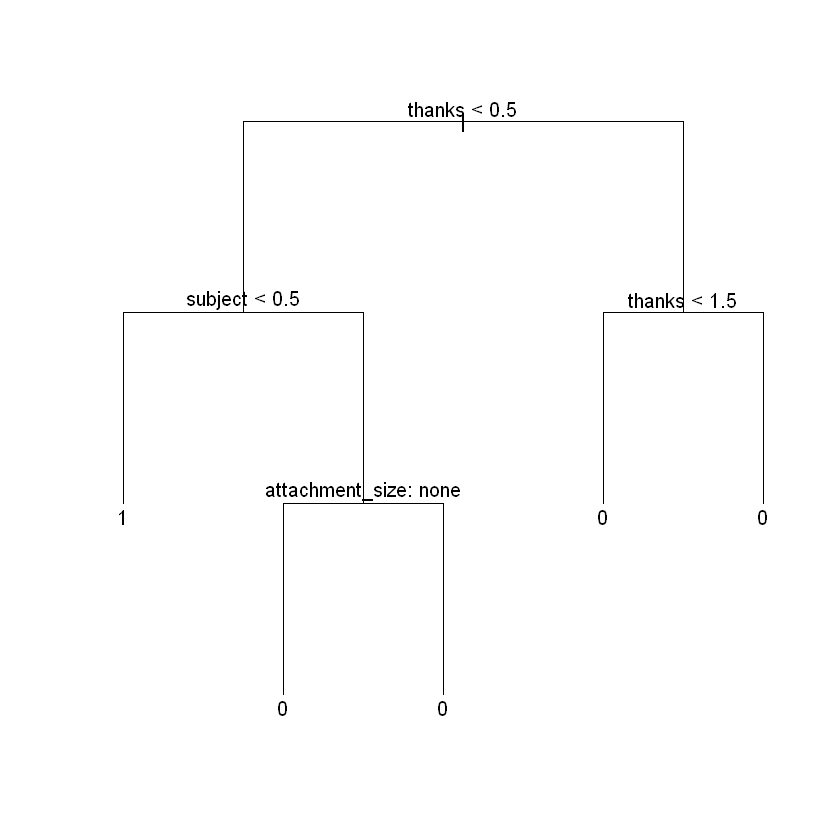

In [17]:
 

# Crear arbol de clasificacion
arbol <- tree(Prediction ~ thanks + subject + attachment_size, data = training_set, split = c("deviance", "gini"))

# Propiedades del arbol
arbol_nodes <- length(arbol$frame$var)
arbol_leafs <- sum(arbol$frame$var == "<leaf>")
arbol_depth <- floor(log(max(as.integer(row.names(arbol$frame))), base = 2))

arbol
summary(arbol)
print(paste0("Numero de nodos: ", arbol_nodes))
print(paste0("Numero de hojas: ", arbol_leafs))
print(paste0("Profundidad: ", arbol_depth))
plot(arbol, type = "uniform")
text(arbol, pretty = 0, cex = 1.0)

#### Testeo de árbol

In [18]:
 

# Testear el arbol
predict_arbol <- predict(arbol, testing_set, type = "class")

# Matriz de confusion
confusion_matrix <- with(testing_set, table(predict_arbol, testing_set$Prediction))

# Calcular accuracy
accuracy_arbol <- sum(predict_arbol == testing_set$Prediction) / length(testing_set$Prediction)

confusion_matrix
print(paste0("Total de datos de testeo: ", length(testing_set$Prediction)))
print(paste0("Predicciones correctas: ", sum(predict_arbol == testing_set$Prediction)))
print(paste0("Predicciones incorrectas: ", sum(predict_arbol != testing_set$Prediction)))
print(paste0("Accuracy: ", accuracy_arbol))

             
predict_arbol  0  1
            0 20  4
            1 25 31

[1] "Total de datos de testeo: 80"
[1] "Predicciones correctas: 51"
[1] "Predicciones incorrectas: 29"
[1] "Accuracy: 0.6375"


### Todos los atributos

#### Construcción de árbol

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 320 443.300 1 ( 0.48438 0.51562 )  
    2) thanks < 0.5 257 344.400 1 ( 0.39300 0.60700 )  
      4) your < 0.5 166 229.300 0 ( 0.53614 0.46386 )  
        8) for. < 0.5 62  68.610 1 ( 0.24194 0.75806 )  
         16) gra < 0.5 53  63.150 1 ( 0.28302 0.71698 )  
           32) now < 0.5 48  51.670 1 ( 0.22917 0.77083 )  
             64) doc < 0.5 41  37.480 1 ( 0.17073 0.82927 ) *
             65) doc > 0.5 7   9.561 0 ( 0.57143 0.42857 ) *
           33) now > 0.5 5   5.004 0 ( 0.80000 0.20000 ) *
         17) gra > 0.5 9   0.000 1 ( 0.00000 1.00000 ) *
        9) for. > 0.5 104 125.000 0 ( 0.71154 0.28846 )  
         18) gra < 0.5 85  79.220 0 ( 0.82353 0.17647 )  
           36) press < 0.5 79  60.010 0 ( 0.87342 0.12658 )  
             72) kin < 0.5 72  41.300 0 ( 0.91667 0.08333 )  
              144) see < 0.5 47  35.900 0 ( 0.87234 0.12766 )  
                288) from < 0.5 32  30.880 0 ( 0.812


Classification tree:
tree(formula = Prediction ~ ., data = training_set, split = c("deviance", 
    "gini"))
Variables actually used in tree construction:
 [1] "thanks"  "your"    "for."    "gra"     "now"     "doc"     "press"  
 [8] "kin"     "see"     "from"    "actual"  "the"     "net"     "send"   
[15] "this"    "here"    "can"     "limited" "real"    "check"  
Number of terminal nodes:  22 
Residual mean deviance:  0.4922 = 146.7 / 298 
Misclassification error rate: 0.1031 = 33 / 320 

[1] "Numero de nodos: 43"
[1] "Numero de hojas: 22"
[1] "Profundidad: 9"


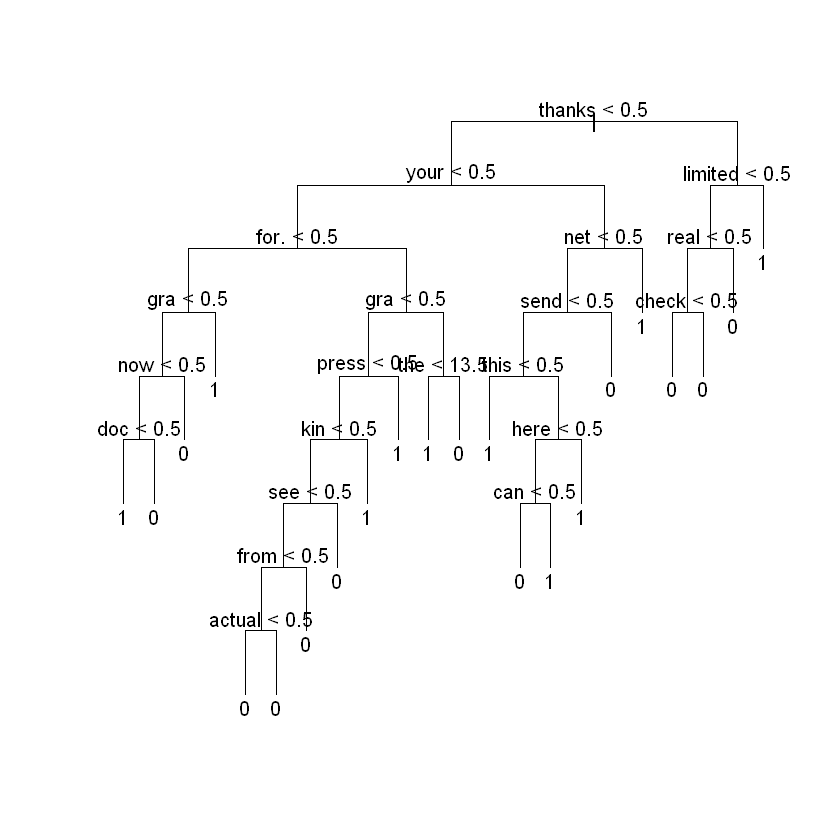

In [19]:
 

# Crear arbol de clasificacion
arbol <- tree(Prediction ~ ., data = training_set, split = c("deviance", "gini"))

# Propiedades del arbol
arbol_nodes <- length(arbol$frame$var)
arbol_leafs <- sum(arbol$frame$var == "<leaf>")
arbol_depth <- floor(log(max(as.integer(row.names(arbol$frame))), base = 2))

arbol
summary(arbol)
print(paste0("Numero de nodos: ", arbol_nodes))
print(paste0("Numero de hojas: ", arbol_leafs))
print(paste0("Profundidad: ", arbol_depth))
plot(arbol, type = "uniform")
text(arbol, pretty = 0, cex = 1.0)

#### Testeo de árbol

In [20]:
 

# Testear el arbol
predict_arbol <- predict(arbol, testing_set, type = "class")

# Matriz de confusion
confusion_matrix <- with(testing_set, table(predict_arbol, testing_set$Prediction))

# Calcular accuracy
accuracy_arbol <- sum(predict_arbol == testing_set$Prediction) / length(testing_set$Prediction)

confusion_matrix
print(paste0("Total de datos de testeo: ", length(testing_set$Prediction)))
print(paste0("Predicciones correctas: ", sum(predict_arbol == testing_set$Prediction)))
print(paste0("Predicciones incorrectas: ", sum(predict_arbol != testing_set$Prediction)))
print(paste0("Accuracy: ", accuracy_arbol))

             
predict_arbol  0  1
            0 32  8
            1 13 27

[1] "Total de datos de testeo: 80"
[1] "Predicciones correctas: 59"
[1] "Predicciones incorrectas: 21"
[1] "Accuracy: 0.7375"
